### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns

In [2]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

### Data structure

In [3]:
data = h5py.File('cutout_344137.hdf5','r')

In [4]:
#print(data.keys())

In [5]:
#for k in data["Header"].attrs:
#   print(k, data["Header"].attrs[k])

### Cosmological parameters

In [6]:
Omega_m, Omega_Lambda, Omega_b, h = data["Header"].attrs['Omega0'], data["Header"].attrs['OmegaLambda'], data["Header"].attrs['OmegaBaryon'], data["Header"].attrs['HubbleParam']

In [8]:
N_dm_particles = data["Header"].attrs['NumPart_ThisFile'][1] #number of dark matter particles
mass_darkm = data["Header"].attrs['MassTable'][1] #mass of each dark matter particle in 1e10 solar masses/h
Box_size = data["Header"].attrs['BoxSize'] #cubic box size
z_redshift = data["Header"].attrs['Redshift'] #redshift
a = data["Header"].attrs['Time'] #scale factor

In [9]:
#N_dm_particles, mass_dm

In [10]:
#data['PartType1'].keys()

### Units

In [11]:
from astropy.constants import G
from astropy.units import km, au, pc, kpc, s, yr, Myr, Gyr, Msun, rad, kg, J, m

In [12]:
G = G.to('kpc3/(Msun*Gyr2)')
G

<Quantity 4.49850215e-06 kpc3 / (solMass Gyr2)>

Predefined the characteristic unit scales according to the dataset according to [TNG unit system](https://www.tng-project.org/data/docs/specifications/#parttype1).


In [13]:
L_u = kpc/h #length unit
V_u = (km/s)*np.sqrt(a) #spatial velocity unit
Phi_u = V_u**2 #potential unit
M_u = 10e10*Msun/h #dark mass unit

In [14]:
#L_u, V_u, Phi_u, M_u

In [15]:
xyz = np.array(data['PartType1']['Coordinates'][:])*L_u #coordinate in co-moving distance
phi = np.array(data['PartType1']['Potential'][:])*Phi_u
vxyz = np.array(data['PartType1']['Velocities'][:])*V_u
mass_dm = mass_darkm*M_u
M = N_dm_particles*mass_dm
#print(XYZ.shape), print(PHI.shape), print(VXYZ.shape)

In [16]:
xyz *=a #conversion to physical distance
# Mean of the velocites and positions coordinates
vxyz_mean = np.mean(vxyz, axis=0)
xyz_mean = np.mean(xyz, axis=0)
#print(vxyz_mean), print(xyz_mean)

Data standardization: here all velocities and positions coordinates are centered around theire mean value.

In [17]:
xyz -= xyz_mean
#vxyz -= vxyz_mean

The potential $\phi$ is the potential at each particle coordinate due to all other particles in the simulation box, i.e, $
\Phi(\mathbf{x}) = -G \sum_{i \neq j} \frac{m_j}{|\mathbf{x} - \mathbf{x}_j|}$.

In [18]:
#distances
r = np.linalg.norm(xyz, axis=1)
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
R = np.sqrt(x**2 + y**2)

#velocities
vx, vy, vz = vxyz[:,0], vxyz[:,1], vxyz[:,2]
v = np.linalg.norm(vxyz, axis=1)

In [19]:
from mpl_toolkits.mplot3d import Axes3D

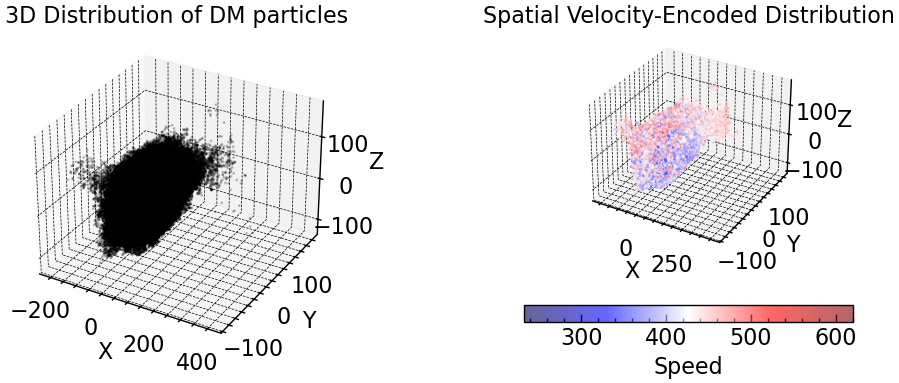

In [152]:
fig = plt.figure(figsize=(12, 4))
ax= fig.add_subplot(1,2,1, projection='3d')
ax.scatter(x, y, z, s=1, c='k', alpha=0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Distribution of DM particles')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc = ax2.scatter(x, y, z, s=1, c=v, cmap='seismic', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spatial Velocity-Encoded Distribution')

fig.colorbar(sc, ax=ax2, label='Speed', orientation='horizontal', shrink=0.5)
plt.tight_layout()
plt.show()


Planar distributions of the dark matter particles in the simulation box.

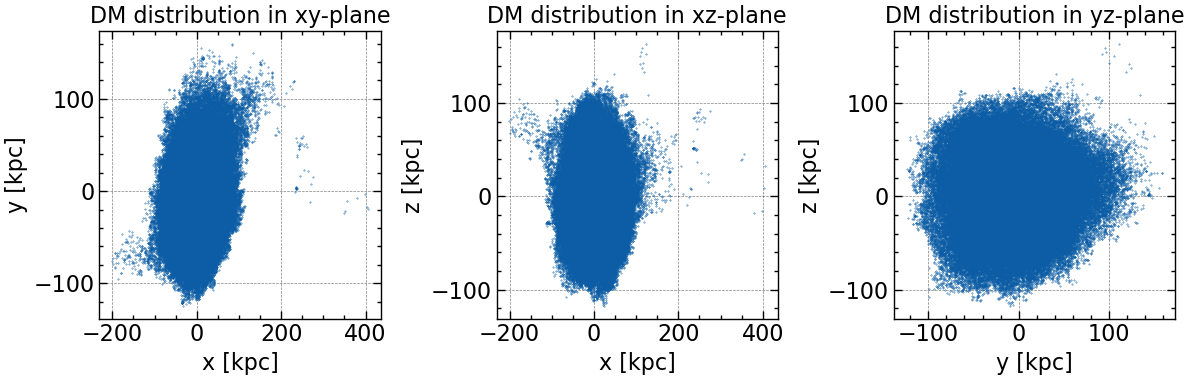

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(x, y, s=0.1)
axes[0].set_xlabel("x [kpc]")
axes[0].set_ylabel("y [kpc]")
axes[0].set_title("DM distribution in xy-plane")

axes[1].scatter(x, z, s=0.1)
axes[1].set_xlabel("x [kpc]")
axes[1].set_ylabel("z [kpc]")
axes[1].set_title("DM distribution in xz-plane")
axes[2].scatter(y, z, s=0.1)
axes[2].set_xlabel("y [kpc]")
axes[2].set_ylabel("z [kpc]")
axes[2].set_title("DM distribution in yz-plane")
plt.tight_layout()
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_14804\3872917960.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


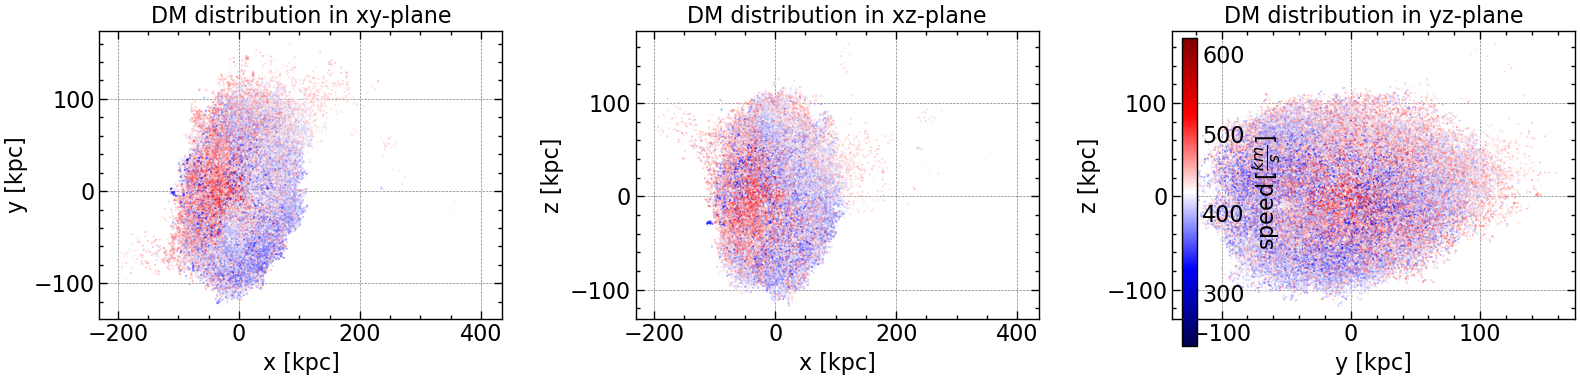

In [268]:
plt.close('all')
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].scatter(x, y, s=0.1, c=v.value, cmap='seismic')
axes[0].set_xlabel("x [kpc]")
axes[0].set_ylabel("y [kpc]")
axes[0].set_title("DM distribution in xy-plane")

axes[1].scatter(x, z, s=0.1, c=v.value, cmap='seismic')
axes[1].set_xlabel("x [kpc]")
axes[1].set_ylabel("z [kpc]")
axes[1].set_title("DM distribution in xz-plane")

ax2 = axes[2].scatter(y, z, s=0.1, c=v.value, cmap='seismic')
axes[2].set_xlabel("y [kpc]")
axes[2].set_ylabel("z [kpc]")
axes[2].set_title("DM distribution in yz-plane")

cbar = fig.colorbar(ax2, ax=axes, orientation='vertical', fraction=0.2, pad=0.04)
cbar.set_label(r'$\text{speed} \,[\frac{km}{s}]$')
plt.tight_layout()
plt.show()

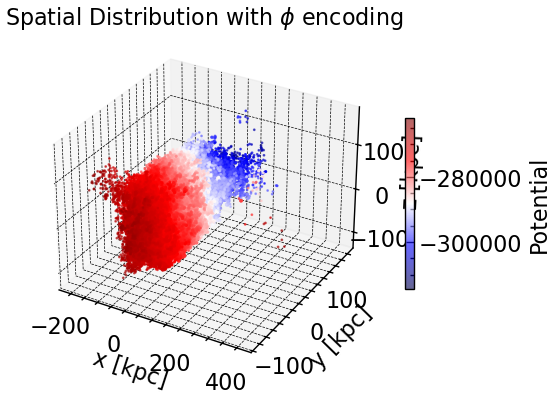

In [154]:
#potential of the system
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
sc = ax.scatter(x, y, z, s=1, c=phi, cmap='seismic', alpha=0.6)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.set_title(r'Spatial Distribution with $\phi$ encoding')
plt.tight_layout()
fig.colorbar(sc, ax=ax, label='Potential', orientation='vertical', shrink=0.5)
plt.show()

### Quantitative analysis

Energy of such a system
\begin{equation}
E = \frac{1}{2} m v^2(r) + m \Phi(r) \quad (4.3)
\end{equation}

In [20]:
E = 1/2*mass_dm*v**2 + mass_dm*phi

In [21]:
#E.shape, r.shape, 

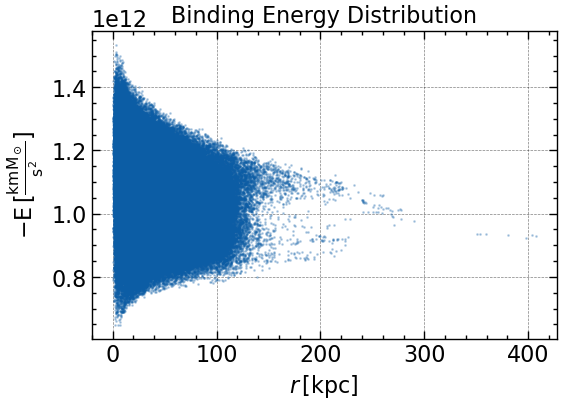

In [22]:
plt.close('all')
fig = plt.figure(figsize=(6, 4))
plt.scatter(r.value, -E.value, s=1, alpha=0.25)
plt.xlabel(r'$r\, [\text{kpc}]$')
plt.ylabel(r'$-\text{E} \, [\frac{\text{km} \text{M}_\odot}{\text{s}^2}]$')
plt.title('Binding Energy Distribution')
plt.show()

## Phase space distribution (we beschouwen dit best ook?)

In [23]:
#phase_space = np.vstack((xyz.T.value, vxyz.T.value)).T
#phase_space.shape

### Test spherical symmetry of the system

Inpirated by [this post](https://scipython.com/books/book2/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/)

In [46]:
from scipy.special import sph_harm_y

In [47]:
#examine sphericity of the system in spherical coordinates
theta = np.arccos(z / r)
phi_angle = np.mod(np.arctan2(y.value, x.value), 2*np.pi)

In [48]:
n_ = 200
H, theta_edges, phi_edges = np.histogram2d(theta.value, phi_angle, bins=[n_, n_])
theta_j = 1/2*(n_)*(theta_edges[:-1] + theta_edges[1:])
phi_j   = 1/2*(n_)*(phi_edges[:-1] + phi_edges[1:])

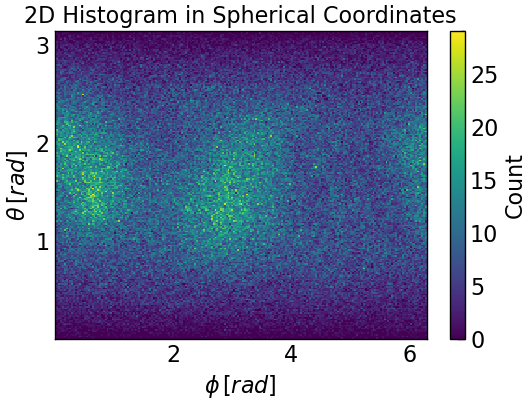

In [49]:
theta_mesh, phi_mesh = np.meshgrid(theta_edges, phi_edges, indexing='ij')
plt.figure(figsize=(6, 4))
im = plt.pcolormesh(phi_mesh, theta_mesh, H, shading='auto', cmap='viridis')
plt.colorbar(im, label='Count')
plt.xlabel(r'$\phi \, [rad]$')
plt.ylabel(r'$\theta \, [rad]$')
plt.title('2D Histogram in Spherical Coordinates')
plt.show()

In [103]:
n_bins = 250
r_min, r_max = r.min(), r.max()
radial_edges = np.linspace(r_min, r_max, n_bins+1)
r_j = 1/2 * (radial_edges[1:] + radial_edges[:-1])

def alm(l,m,phi,theta, radial_edges, r):
    alm_r = np.zeros(n_bins, dtype=complex)
    for j in range(n_bins):
        r_lo, r_hi = radial_edges[j], radial_edges[j+1]
        mask = (r >= r_lo) & (r < r_hi)

        if np.sum(mask) == 0:
            continue

        theta_shell = theta[mask]
        phi_shell = phi[mask]

        alm_r[j] = np.sum(sph_harm_y(l, m, phi_shell.value, theta_shell.value))
    return alm_r

In [104]:
#r_j

In [105]:
a00 = alm(0, 0, phi, theta, radial_edges, r)
a10 = alm(1, 0, phi, theta, radial_edges, r)
a1m1 = alm(1, -1, phi, theta, radial_edges, r)
a11 = alm(1, 1, phi, theta, radial_edges, r)
a20 = alm(2, 0, phi, theta, radial_edges, r)
a2m1 = alm(2, -1, phi, theta, radial_edges, r)
a2m2 = alm(2, -2, phi, theta, radial_edges, r)
a21 = alm(2, 1, phi, theta, radial_edges, r)
a22 = alm(2, 2, phi, theta, radial_edges, r)
a30 = alm(3, 0, phi, theta, radial_edges, r)
a31 = alm(3, 1, phi, theta, radial_edges, r)
a32 = alm(3, 2, phi, theta, radial_edges, r)
a33 = alm(3, 3, phi, theta, radial_edges, r)
a3m1 = alm(3, -1, phi, theta, radial_edges, r)
a3m2 = alm(3, -2, phi, theta, radial_edges, r)
a3m3 = alm(3, -3, phi, theta, radial_edges, r)

In [106]:
#a3m3[0]

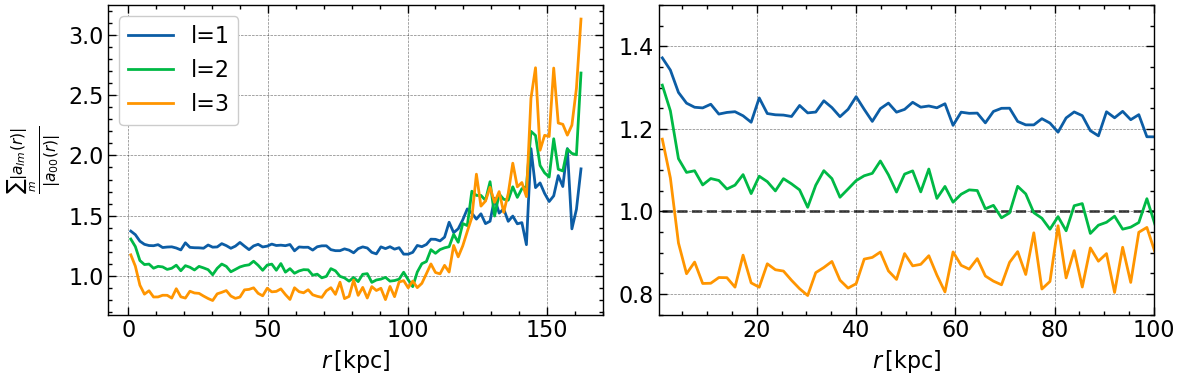

In [107]:
plt.close('all')
ss =  100
A = np.abs(a00[0:ss])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.plot(r_j[0:ss], np.ones_like(r_j[0:ss]), 'k--', label='spherical symmetry', alpha=0.7)
axes[0].plot(r_j[0:ss], (np.abs(a10[0:ss]) + np.abs(a11[0:ss]) + np.abs(a1m1[0:ss]))/A, label ='l=1')
axes[0].plot(r_j[0:ss], (np.abs(a22[0:ss]) + np.abs(a2m2[0:ss]) + np.abs(a21[0:ss]) + np.abs(a20[0:ss]) + np.abs(a2m1[0:ss]))/A, label ='l=2')
axes[0].plot(r_j[0:ss], (np.abs(a30[0:ss]) + np.abs(a31[0:ss]) + np.abs(a32[0:ss]) + np.abs(a33[0:ss]) + np.abs(a3m1[0:ss]) + np.abs(a3m2[0:ss]) + np.abs(a3m3[0:ss]))/A, label ='l=3')
axes[0].set_xlabel(r'$r \, [\text{kpc}]$')
axes[0].set_ylabel(r'$\frac{\sum_m|a_{lm}(r)|}{|a_{00}(r)|}$')
axes[0].legend()

axes[1].plot(r_j[0:ss], (np.abs(a10[0:ss]) + np.abs(a11[0:ss]) + np.abs(a1m1[0:ss]))/A, label ='l=1')
axes[1].plot(r_j[0:ss], (np.abs(a22[0:ss]) + np.abs(a2m2[0:ss]) + np.abs(a21[0:ss]) + np.abs(a20[0:ss]) + np.abs(a2m1[0:ss]))/A, label ='l=2')
axes[1].plot(r_j[0:ss], (np.abs(a30[0:ss]) + np.abs(a31[0:ss]) + np.abs(a32[0:ss]) + np.abs(a33[0:ss]) + np.abs(a3m1[0:ss]) + np.abs(a3m2[0:ss]) + np.abs(a3m3[0:ss]))/A, label ='l=3')
axes[1].set_xlabel(r'$r \, [\text{kpc}]$')
#axes[1].set_ylabel(r'$\frac{\sum_m|a_{lm}(r)|}{|a_{00}(r)|}$')
axes[1].set_xlim(0.2, 100) 
axes[1].set_ylim(0.75, 1.5)

plt.tight_layout()
plt.show()

### Task 1 : density

\begin{equation}
\rho(\mathbf{x}) = \frac{\Delta M}{\Delta V}
\end{equation}

Compute a histogram for different radii

In [108]:
bins = np.linspace(r_min.value, r_max.value, n_bins)
r_j = 1/2* (bins[1:] + bins[:-1])*kpc

counts, _ = np.histogram(r.value, bins=bins)
vol = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)

rho_j = counts*mass_dm/vol  # density

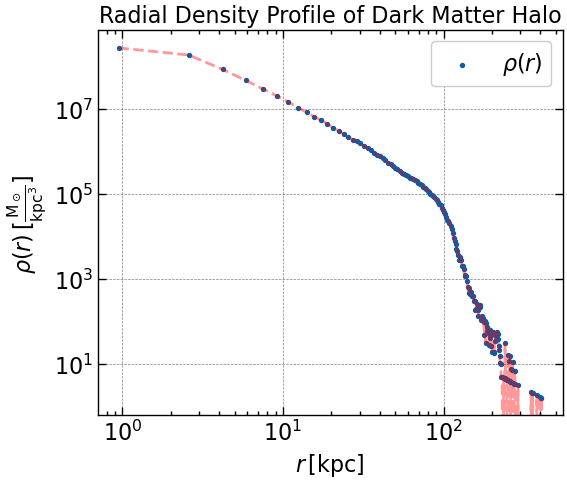

In [113]:
plt.close('all')
plt.figure(figsize=(6,5))
plt.scatter(r_j, rho_j, s=8, label=r'$\rho(r)$')
plt.plot(r_j, rho_j, '--', color='red', alpha=0.4)
plt.xlabel(r'$r\,\text{[kpc]}$')
plt.ylabel(r'$\rho(r)\, [\frac{\text{M}_\odot}{\text{kpc}^3}]$')
plt.title('Radial Density Profile of Dark Matter Halo')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

#### Compute the potential given the density

1. Enclosed mass
\begin{equation}
    M(r_i) = 4\pi \sum_{r_j \leq r_i}  r'^2_j \rho(r_j) \, \Delta r_j
\end{equation}

In [116]:
M_j = 4 * np.pi * np.cumsum(rho_j * r_j**2 * np.diff(bins))
#M_j

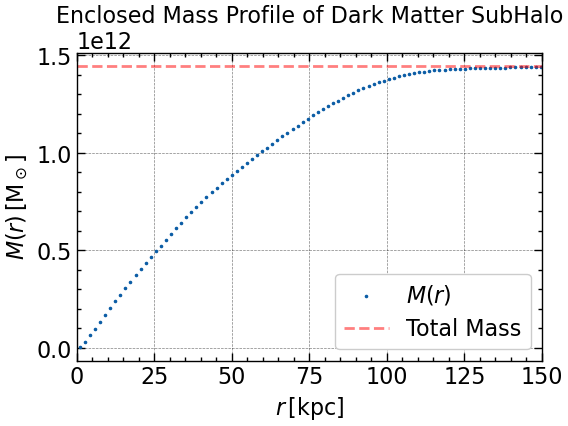

In [117]:
plt.close('all')
plt.figure(figsize=(6,4))
plt.scatter(r_j, M_j, s=10, label=r'$M(r)$', marker='.')
plt.xlabel(r'$r\,[\text{kpc}]$')
plt.ylabel(r'$M(r)\,[\text{M}_\odot]$')
plt.axhline(M.value, color='red', linestyle='--', label='Total Mass', alpha=0.5)
plt.title('Enclosed Mass Profile of Dark Matter SubHalo')
plt.xlim(0, 150)
plt.legend()
plt.show()

2. Potential
\begin{equation}
    \Phi(r_i) = -\frac{G M(r_i)}{r_i} - 4\pi G \sum_{r_j \leq r_i} \rho(r_j) r'_j \, \Delta r_j
\end{equation}

In [118]:
Phi_j = -G*M_j/r_j - 4*np.pi*G*np.cumsum(rho_j*r_j*np.diff(bins)[0])

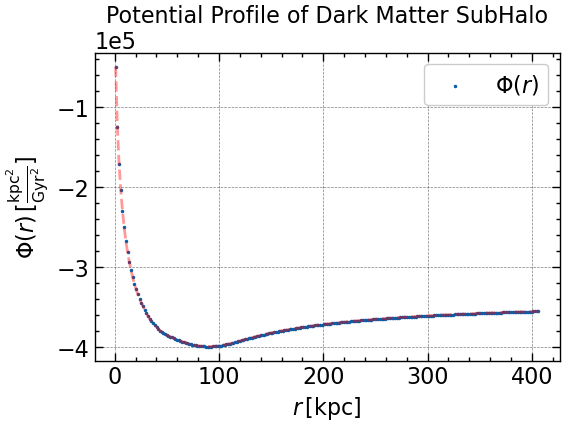

In [177]:
plt.close('all')
plt.figure(figsize=(6,4))
plt.scatter(r_j, Phi_j, s=9, label=r'$\Phi(r)$', marker='.')
plt.plot(r_j, Phi_j, '--', color='red', alpha=0.4)
plt.xlabel(r'$r\, [\text{kpc}]$') 
plt.ylabel(r'$\Phi(r)\,[\frac{\text{kpc}^2}{\text{Gyr}^2}]$')
plt.title('Potential Profile of Dark Matter SubHalo')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend()
plt.savefig('Figures/Potential_Profile.pdf', bbox_inches='tight')
plt.show()

### Integration with galpy density profiles

In [128]:
from scipy.optimize import curve_fit

In [129]:
def rho_plummer(r, b, rho0):
    r_b = r/b
    return rho0*(1 + r_b**2)**(-5/2)

def rho_DEHNEN(r, b, rho0, gamma):
    r_b =r/b
    return rho0*r_b**(-gamma)*(1 + r_b)**(gamma - 4)

def rho_Hernquist(r, b, rho0):
    return rho_DEHNEN(r, b, rho0=rho0, gamma=1)

def rho_Jaffe(r, b, rho0):
    return rho_DEHNEN(r, b, rho0=rho0, gamma=2)

def DPL(r, b, beta, rho0, gamma): #double power law
    r_b = r/b
    return rho0/(r_b**gamma* (1 + r_b)**(beta - gamma))

def rho_NFW(r, b, rho0):
    r_b = r/b
    return rho0/(r_b*(1 + r_b)**2)

In [130]:
popt_plummer, pcov_plummer = curve_fit(rho_plummer, r_j.value, rho_j.value, p0=[20, 1e8])
popt_Hernquist, pcov_Hernquist = curve_fit(rho_Hernquist, r_j.value, rho_j.value, p0=[20, 1e8], maxfev=10000)
popt_Jaffe, pcov_Jaffe = curve_fit(rho_Jaffe, r_j.value, rho_j.value, p0=[30, 1e8], maxfev=10000)
popt_NFW, pcov_NFW = curve_fit(rho_NFW, r_j.value, rho_j.value, p0=[70, 1e9], maxfev=10000)
popt_dpl, pcov_dpl = curve_fit(DPL, r_j.value, rho_j.value, p0=[50, 4, 1e9, 2], maxfev=10000)

C:\Users\chris\AppData\Local\Temp\ipykernel_9040\3580592605.py:17: RuntimeWarning: invalid value encountered in power
  return rho0/(r_b**gamma* (1 + r_b)**(beta - gamma))
C:\Users\chris\AppData\Local\Temp\ipykernel_9040\3580592605.py:17: RuntimeWarning: overflow encountered in power
  return rho0/(r_b**gamma* (1 + r_b)**(beta - gamma))
C:\Users\chris\AppData\Local\Temp\ipykernel_9040\3580592605.py:17: RuntimeWarning: invalid value encountered in multiply
  return rho0/(r_b**gamma* (1 + r_b)**(beta - gamma))


In [131]:
rho_plummer_j = rho_plummer(r_j, b=popt_plummer[0]*kpc, rho0=popt_plummer[1])
rho_Hernquist_j = rho_Hernquist(r_j, b=popt_Hernquist[0]*kpc, rho0=popt_Hernquist[1])
rho_Jaffe_j = rho_Jaffe(r_j, b=popt_Jaffe[0]*kpc, rho0=popt_Jaffe[1])
rho_NFW_j = rho_NFW(r_j, b=popt_NFW[0]*kpc, rho0=popt_NFW[1])
rho_DPL_j = DPL(r_j, b=popt_dpl[0]*kpc, beta=popt_dpl[1], rho0=popt_dpl[2], gamma=popt_dpl[3])

c:\Users\chris\anaconda3\envs\TANA2025\Lib\site-packages\astropy\units\quantity.py:659: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [132]:
#rho_DPL_val = DPL(bin_centers, b=85*kpc, beta=6, gamma=1.8, M=-popt_dpl[3]*Msun)
#rho_DPL_val

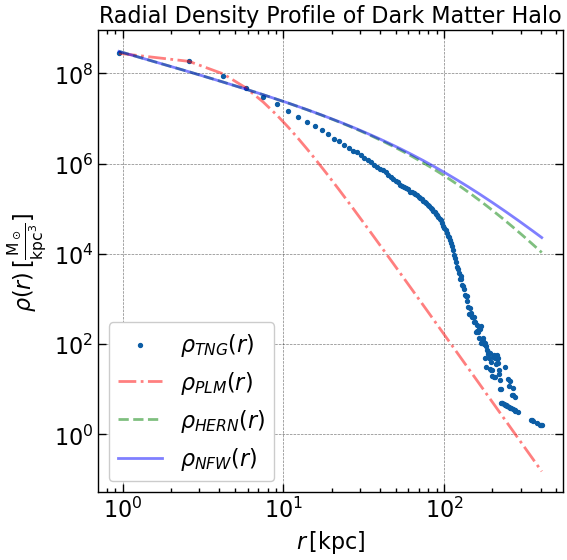

In [176]:
plt.close('all')
plt.figure(figsize=(6,6))
plt.scatter(r_j.value, rho_j.value, s=8, label=r'$\rho_{TNG}(r)$')
plt.plot(r_j.value, rho_plummer_j, '-.', color='red', alpha=0.5, label=r'$\rho_{PLM}(r)$')
plt.plot(r_j.value, rho_Hernquist_j, '--', color='green', alpha=0.5, label=r'$\rho_{HERN}(r)$')
#plt.plot(r_j.value, rho_Jaffe_j, '-', color='orange', alpha=0.5, label=r'$\rho_{JAFFE}(r)$')
plt.plot(r_j.value, rho_NFW_j, '-', color='blue', alpha=0.5, label=r'$\rho_{NFW}(r)$')
#plt.plot(r_j.value, rho_DPL_j, ':', color='purple', alpha=0.5, label=r'$\rho_{DPL}(r)$')
plt.xlabel(r'$r\,\text{[kpc]}$')
plt.ylabel(r'$\rho(r)\, [\frac{\text{M}_\odot}{\text{kpc}^3}]$')
plt.title('Radial Density Profile of Dark Matter Halo')
plt.legend()
plt.yscale('log')
plt.xscale('log')
#save in figure folder
plt.savefig('Figures/Density_Profile_Fits.pdf', bbox_inches='tight')
plt.show()

### Integration with galpy

In [136]:
from galpy.potential import PlummerPotential as PLMPOT, HernquistPotential as HernPOT, NFWPotential as NFWPOT

In [139]:
plmpot = PLMPOT(amp=popt_plummer[1]*Msun, b=popt_plummer[0]*kpc)
hernpot = HernPOT(amp=popt_Hernquist[1]*Msun, a=popt_Hernquist[0]*kpc)
nfwpot = NFWPOT(amp=popt_NFW[1]*Msun, a=popt_NFW[0]*kpc)

In [140]:
plmdens = plmpot.dens(r_j, 0)

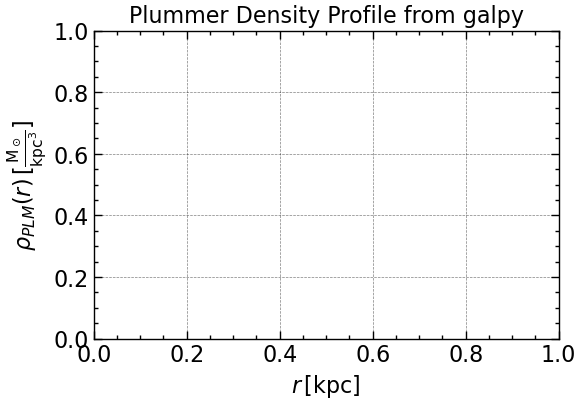

In [174]:
plt.close('all')
fig = plt.figure(figsize=(6, 4))
#plt.scatter(r_j, Phi_j, s=9, label=r'$\Phi(r)$', marker='.')
#plt.plot(r_j, plmdens,label=r'$\rho_{PLM}(r)$', color='orange', marker='.')
plt.xlabel(r'$r\, [\text{kpc}]$')   
plt.ylabel(r'$\rho_{PLM}(r)\, [\frac{\text{M}_\odot}{\text{kpc}^3}]$')
plt.title('Plummer Density Profile from galpy')
plt.show()

Escape velocity:
$$v_\mathrm{esc}(r) = \sqrt{-\frac{2}{m}V_1} = \sqrt{-2\Phi(r)}$$


In [170]:
v_esc_j = np.sqrt(-2*phi)#.to('km/s')

Text(0, 0.5, '$v_{esc}(r)\\, [\\frac{km}{s}]$')

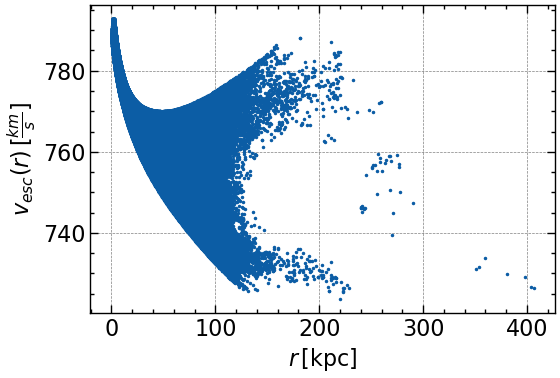

In [173]:
plt.close('all')
fig = plt.figure(figsize=(6, 4))
plt.scatter(r, v_esc_j, s=9, label=r'$v_{esc}(r)$', marker='.')
plt.xlabel(r'$r\, [\text{kpc}]$')
plt.ylabel(r'$v_{esc}(r)\, [\frac{km}{s}]$')